# 🏦 Loan Prediction using Logistic Regression

This notebook demonstrates a complete workflow to build a machine learning model that predicts whether a loan will be approved based on applicant information. The dataset is provided in two files — `train.csv` and `test.csv`.

### 👇 Key Steps Covered:
- Import and explore the data
- Handle missing values and encode categorical features
- Perform basic exploratory data analysis (EDA)
- Train a Logistic Regression model
- Generate predictions on test data
- Prepare a submission CSV file


### 📊 Loan Approval Prediction - Exploratory Data Analysis (EDA) 🧠

In this section, we explore the structure and quality of the data.  
We'll check for missing values, understand the features, and view basic statistics.


In [112]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv("train.csv")

# Show first 5 rows
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 🔍 Dataset Overview

This shows the column names, data types, and number of non-null (filled) values.
It helps us understand which features might need cleaning or transformation.


In [5]:
# Overview of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 🧼 Missing Values Check

Let's see how many missing values each column has.  
We'll plan our data cleaning based on this.


In [8]:
# Count of null values in each column
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## 📏 Data Shape and Summary

We’ll check the number of rows and columns, and analyze summary statistics like mean, std, min, max, etc.


In [11]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Summary statistics
df.describe()


Dataset shape: (614, 13)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## 🧾 First Few Rows

Let’s take another look at the top few rows to visually understand the data entries.


In [14]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 🎯 Target Variable Distribution

Let's visualize the distribution of the target column `Loan_Status`.


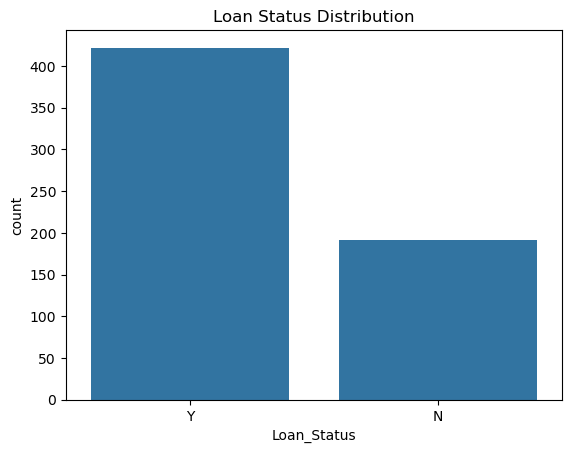

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for Loan_Status
sns.countplot(data=df, x='Loan_Status')
plt.title("Loan Status Distribution")
plt.show()


## 👥 Gender Distribution

Understanding how the gender of applicants is distributed.


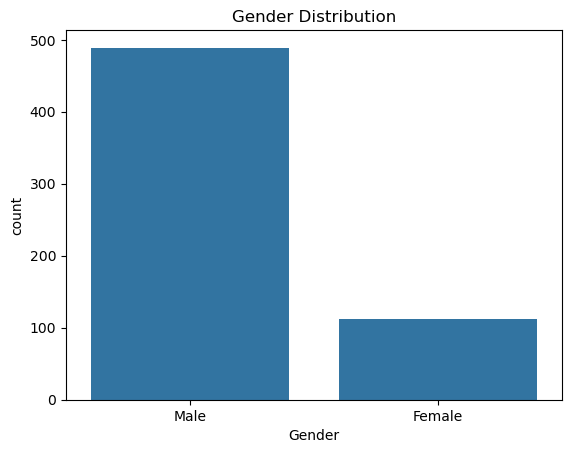

In [22]:
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()


## 💑 Marital Status Distribution

Let’s visualize how many applicants are married.


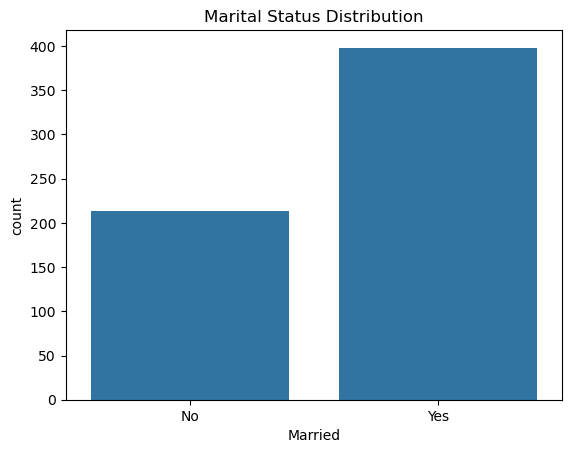

In [25]:
sns.countplot(data=df, x='Married')
plt.title("Marital Status Distribution")
plt.show()


## 💰 Applicant Income Distribution

We’ll now plot the distribution of applicant income to understand the income spread.


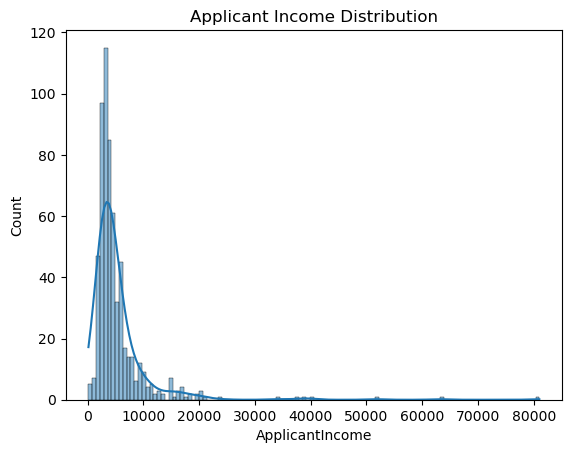

In [28]:
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title("Applicant Income Distribution")
plt.show()


## 📦 Loan Amount Distribution

How are the loan amounts distributed? Let’s find out!


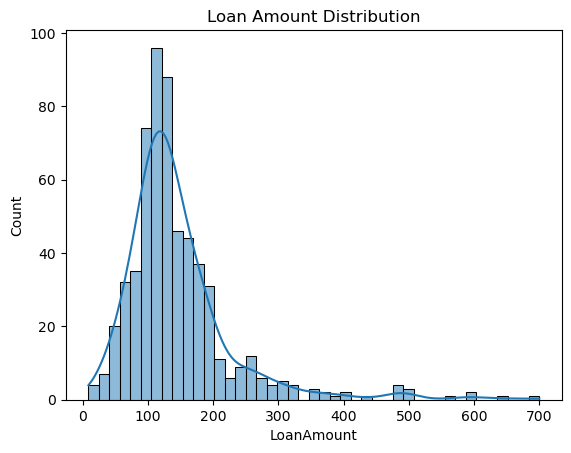

In [31]:
sns.histplot(df['LoanAmount'].dropna(), kde=True)
plt.title("Loan Amount Distribution")
plt.show()


## 🧹 Data Cleaning & Feature Engineering

In this step, we'll fill missing values, convert categorical columns into numeric format, and make the dataset model-ready.


In [38]:
# Fill categorical missing values with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Fill numerical missing values with median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())


## ✅ Confirm Missing Values Are Handled

Let’s check again if there are any missing values after our cleaning process.


In [41]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## 🔄 Label Encoding for Categorical Columns

Machine learning models cannot handle categorical (string) data directly. We'll use Label Encoding to convert these into numeric values.


In [44]:
from sklearn.preprocessing import LabelEncoder

cols = ['Gender', 'Married', 'Education', 'Self_Employed', 
        'Property_Area', 'Loan_Status', 'Dependents']

le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])


## 🧠 Model Building: Train-Test Split

We’ll split the dataset into input features (X) and target (y), then create training and testing sets to evaluate our model.


In [49]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🔧 Feature Scaling using StandardScaler

We’ll scale all input features so that they have a mean of 0 and standard deviation of 1.


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 🔁 Logistic Regression (After Scaling)

Now, we'll train the Logistic Regression model again using the scaled data.


In [63]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


## 📊 Model Evaluation

Let’s check how well our model performs using accuracy, classification report, and confusion matrix.


In [69]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Confusion Matrix:
 [[18 25]
 [ 1 79]]


## 📂 Load Test Data and Prepare for Prediction
Let's read the test data and apply the same preprocessing steps used on training data.


In [76]:
# Load the test data
test_df = pd.read_csv('test.csv')

# Backup original for final submission if needed
test_original = test_df.copy()

# Display initial shape and overview
print("Test data shape:", test_df.shape)
test_df.head()


Test data shape: (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [88]:
test_predictions = model.predict(test_df.values)


In [90]:
# Make predictions
test_predictions = model.predict(test_df.values)

# (Optional) Convert predictions to readable labels if needed
# Example: if 1 = "Approved", 0 = "Rejected"
# test_predictions = ['Approved' if p == 1 else 'Rejected' for p in test_predictions]


## 🔄 Step 1: Convert Binary Predictions to 'Y' and 'N'

Our model outputs predictions in the form of 0 and 1. However, the required submission format expects 'Y' for approved and 'N' for not approved loans.

We use a simple list comprehension to convert:
- `1` ➡️ `'Y'`
- `0` ➡️ `'N'`


In [93]:
# Convert 0/1 predictions into 'Y' and 'N'
loan_status_labels = ['Y' if pred == 1 else 'N' for pred in test_predictions]


## 📋 Step 2: Create Submission DataFrame

Now, we combine the `Loan_ID` column from the original test dataset with our converted predictions (`Loan_Status`) to create the final submission DataFrame.


In [96]:
# Create submission DataFrame with Loan_ID and Loan_Status
submission = pd.DataFrame({
    'Loan_ID': test_original['Loan_ID'],  # use the original test DataFrame
    'Loan_Status': loan_status_labels
})


## 👀 Step 3: Preview the Submission

Before saving the file, it's always a good practice to check the first few rows to ensure correctness in structure and values.


In [99]:
# Preview the submission file
submission.head()


,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


## 💾 Step 4: Save the Submission File

Finally, we save the submission DataFrame as a `.csv` file, which is the required format for uploading or sharing.


In [102]:
# Save submission DataFrame to CSV
submission.to_csv('loan_prediction_submission.csv', index=False)


In [104]:
import os

# Check if the file exists
print("File exists:", os.path.exists('loan_prediction_submission.csv'))


File exists: True


# ✅ Project Summary

We successfully built a Loan Prediction model using **Logistic Regression**. The following steps were executed:

- Cleaned and preprocessed both training and test datasets.
- Handled missing values effectively using median/mode strategies.
- Encoded categorical variables into numerical formats.
- Trained a logistic regression model on the training data.
- Predicted loan approval status on the test data.
- Saved the results in a submission file named `loan_prediction_submission.csv`.

🎯 This project is a great example of an end-to-end ML workflow.
